In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline 

plt.style.use('default')

sns.set(style = 'whitegrid')


In [18]:
eventos_2018 = pd.read_csv('events.csv')


/home/pelozo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
#Paso la fecha a date time

#Seteo el index como la fecha.
eventos_2018['timestamp_format'] = pd.to_datetime(eventos_2018['timestamp'])
eventos_2018.set_index("timestamp_format", inplace=True, drop=False)

# Agrego columna fecha
eventos_2018['date'] = eventos_2018.index.date
# Agrego columna para los meses.
eventos_2018['month'] = eventos_2018.index.month
# Agrego columna dias
eventos_2018['day'] = eventos_2018.index.weekday_name


In [17]:
eventos_2018["event"].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [46]:
#Información sobre el data frame 

eventos_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1011288 entries, 2018-05-31 23:38:05 to 2018-06-04 23:18:10
Data columns (total 27 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null 

In [23]:
#Veo la distribucion de eventos
eventos_2018["event"].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [176]:
#Busco dispositivos usados

dispositivos_visitas = eventos_2018.groupby("device_type")["event"].count().to_frame()

total = dispositivos_visitas.sum()

#Agrego el procentaje
dispositivos_visitas["porcentaje"] = dispositivos_visitas["event"].map(lambda x : float(x / total) * 100)


Text(0.5,1,'Dispositivos usados para evento visited site')

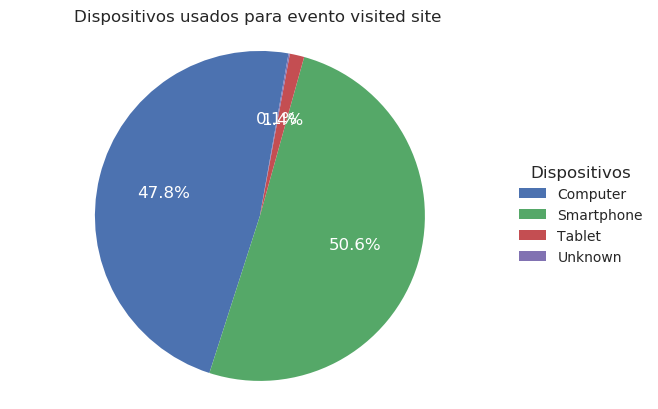

In [205]:
# Pie chart de porcentaje de dispositivos usados. Hay que solucionar el pequeño porcentaje de Unknown que colisiona
labels = dispositivos_visitas.index
sizes = dispositivos_visitas["porcentaje"]

fig1, ax1 = plt.pyplot.subplots()

wedges , texts , autotexts = ax1 . pie ( sizes, autopct='%1.1f%%', startangle = 80 , 
                                       textprops = dict ( color = "w" ),
                                       )

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1 . legend ( wedges , labels ,
          title = "Dispositivos" ,
          loc = "center left" ,
          bbox_to_anchor = ( 1 , 0 , 0.5 , 1 ))

ax1.set_title("Dispositivos usados para evento visited site")

Text(0,0.5,'Modelo')

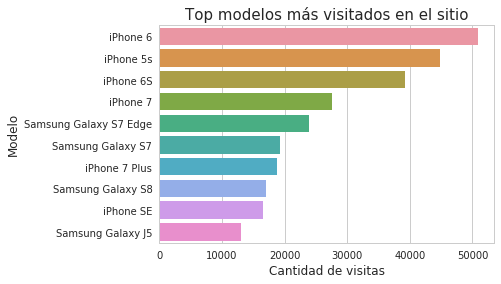

In [47]:
#Busco top 10 smartphones mas visitados

top_modelos_visitados = eventos_2018.groupby("model")["event"].count().sort_values(ascending=False)[:10]

g = sns.barplot(x=top_modelos_visitados.values, y=top_modelos_visitados.index, orient='h')
g.set_title("Top modelos más visitados en el sitio", fontsize=15)
g.set_xlabel("Cantidad de visitas", fontsize=12)
g.set_ylabel("Modelo", fontsize=12)


In [40]:
#Busco termino de busqueda mas usado
#Se observa que las marcas mas buscadas son Iphone - Motorola - Samsung
#Habria que buscar forma de filtrar los valores para tener numeros especificos
eventos_2018["search_term"].value_counts().head(20)

Iphone       1207
Iphone 6     1057
iPhone 6     1005
iphone 6      932
iphone        882
iphone 6s     784
Iphone 6s     736
iPhone 6s     716
Motorola      679
iPhone        638
J7            580
J5            540
Samsung       513
S7            474
iphone 7      428
Iphone 7      412
iPhone 7      371
j7            370
s8            354
S8            346
Name: search_term, dtype: int64

Text(0,0.5,'Cantidad de visitas por publicidad')

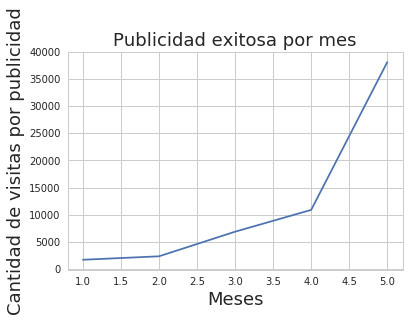

In [39]:
#Quiero saber como fueron evolucionando las campañas de publicidad

campaña_exitosa = eventos_2018[eventos_2018['event'] == "ad campaign hit"]

camp_por_fecha = campaña_exitosa.groupby('month')["event"].count().drop(6)

g = camp_por_fecha.plot()
g.set_title("Publicidad exitosa por mes", fontsize=18)
g.set_xlabel("Meses", fontsize=18)
g.set_ylabel("Cantidad de visitas por publicidad", fontsize=18)

In [59]:
#Veo new vs returning
eventos_2018["new_vs_returning"].value_counts() 
#Hay 26898 usuarios nuevos, vamos a ver como evoluciono en el tiempo

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

Text(0,0.5,'Cantidad de usuarios nuevos')

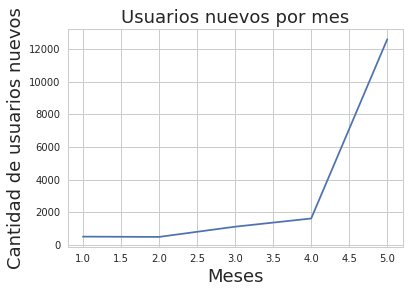

In [60]:
us_nuevos = eventos_2018[eventos_2018['new_vs_returning'] == "New"]


#Cuento y elimino el mes 6 datos incompletos
us_nuevos_mes = us_nuevos.groupby('month')["new_vs_returning"].count().drop(6)

g = us_nuevos_mes.plot()
g.set_title("Usuarios nuevos por mes", fontsize=18)
g.set_xlabel("Meses", fontsize=18)
g.set_ylabel("Cantidad de usuarios nuevos", fontsize=18)

En las ultimas dos visualizaciones podemos observar que el sitio ha tenido un gran salto en la cantidad de usuarios
nuevos dentro del los meses Abril-Mayo que se condice con el crecimiento de las campañas exitosas de publicidad esos meses.

Text(0,0.5,'Modelo')

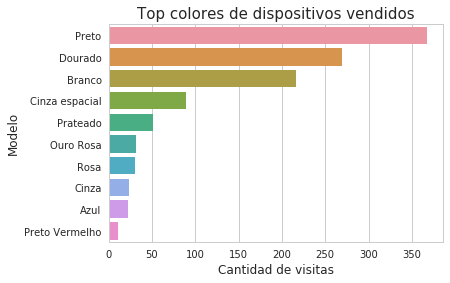

In [58]:

top_colores = eventos_2018[eventos_2018["event"] == "conversion"].groupby("color")["event"].count().sort_values(ascending=False)[:10]

g = sns.barplot(x=top_colores.values, y=top_colores.index, orient='h')
g.set_title("Top colores de dispositivos vendidos", fontsize=15)
g.set_xlabel("Cantidad de visitas", fontsize=12)
g.set_ylabel("Modelo", fontsize=12)


#comprados = eventos_2018[eventos_2018['event'] == 'conversion']["color"].value_counts()
